In [1]:
#Run once
import tensorflow as tf
from tensorflow import keras

import random
from random import randint
import numpy as np
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn import metrics

print(tf.__version__)

1.12.0-rc1


#Image Classification
Image classification works by turning images into a table with pixels  

![alt text](https://tensorflow.rstudio.com/tensorflow/articles/images/MNIST-Matrix.png) 
*Credit: Tensorflow for R*

##Softmax
Softmax returns a list of the likelihood of each possibilty, the largest number 

![alt text](https://www.superdatascience.com/wp-content/uploads/2018/08/CNN_Softmax_Img1.png)
*Credit: Super Data Science*

#1. The MNIST dataset
![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset is probably the most important dataset in all of ML, it is the foundation and testing ground for image classification models. The MNIST dataset is a collection of 70,000 28 by 28 pictures of the numbers zero to nine.

Keras has a series of datasets that can be loaded in with a few lines of code, the MNIST dataset is one of them ([Here](https://keras.io/datasets/) is the full list)

In [6]:
train_MNIST_images[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [1]:
from keras.datasets import mnist
(train_MNIST_images, train_MNIST_labels), (test_MNIST_images, test_MNIST_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Run the following then read the below
print("This is the number: "+ str(train_MNIST_labels[0]))
train_MNIST_images[0]
#feel free to delete the result

While this doesn't look like the number five, it is. Currently the image is being stored as a table with 60,000 rows and 28 columns with an addtional 28 numbers in each cell. Each cell has a number representing a greyscale pixel stored as a number between 0 and 256 (0 represents white and 256 black).

So you need to do some data pre-processing in order for the data to be readable for our model. You do not need to randomize data, or set aside test data as both of these have been done already. You need to reshape it to a table with 784 columns and each number needs to be from zero to one. 

In [0]:
train_MNIST_images = train_MNIST_images.reshape(-1, 28 * 28)/256
test_MNIST_images = test_MNIST_images.reshape(-1, 28 * 28)/256

Let's display an image

In [0]:
#Here is a function that displays an image of the 
def display_image(image, label): #outputs an image along with what the model predicts, and true label
  _, ax = plt.subplots()
  ax.matshow(image.reshape(28, 28))
  ax.set_title("Label: %s" % (label))
  ax.grid(False)

In [0]:
random_number = randint(0,60000)
image = train_MNIST_images[random_number]
label = train_MNIST_labels[random_number]

display_image(image, label)

#2. Making an image classifcation model

Now that the data is imported lets build a model!

There are two functions below, create_model and model_run.

`create_model()` will be used to define the shape of our model. Currently `create_model()`makes a softmax model that has two layers, 96 nodes. 

`model_run()` trains the model of our data

In [0]:
def create_model(): #this makes the model shape, add or remove layers
  model = tf.keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    #If you want to add more layers to this copy the two lines above and replace this
    keras.layers.Dense(10, activation=tf.nn.softmax) #outputs one of then 
  ])
  
  model.compile(optimizer=tf.keras.optimizers.Adagrad(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  return model


def model_train(epoch, images, labels, num_images): #trains the model
  model = create_model()
  model.fit(images[:num_images], labels[:num_images], epochs=epoch)  
  return model

In [13]:
MNIST_model = model_train(2, #epochs,
                          train_MNIST_images, #input data/features
                          train_MNIST_labels, #input labels
                          20000 #num train images, less then 60,000
                          )

Epoch 1/2
20000/20000 [==============================] - 2s 90us/step - loss: 0.3938 - acc: 0.8883
Epoch 2/2
20000/20000 [==============================] - 1s 60us/step - loss: 0.2175 - acc: 0.9390


Now that we have our model let's see how our model does at predicting images from our test set. 

In [0]:
def predict_image_label(eval_model, image): #predicts the label for a single image
  prediction = eval_model.predict(np.array([image])) 
  predicted_label = (np.argmax(prediction))
  return predicted_label

def predict_image(image, model, actual_label): #outputs an image along with what the model predicts, and true label
  predicted_label=predict_image_label(model, image)
  _, ax = plt.subplots()
  ax.matshow(image.reshape(28, 28))
  ax.set_xlabel("Label: %s" % (actual_label), fontsize=15)
  ax.set_title("Predicted: %s" % (predicted_label), fontsize=20)
  ax.grid(False)

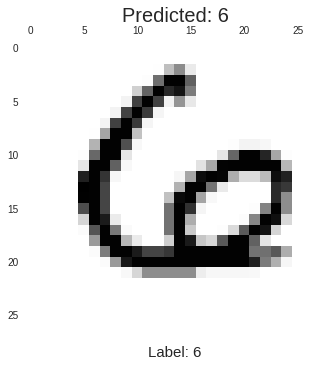

In [20]:
random_number = randint(0,60000) # 
image = train_MNIST_images[random_number]
label = train_MNIST_labels[random_number]

predict_image(image, MNIST_model, label)

While this is an intresting demonstration lets see some statistical data. You will look at the final accuracy and a confusion Matrix for the model

A confusion Matrix displays the predicted vs actual label. Try changing your model and see how the confusion matrix changes.



In [0]:
def stats(model, num_images, images, labels): #prints out the basic stats, and a confusion matrix
  images = images[:num_images]
  labels = labels[:num_images]
  confusion_matrix(model, images, labels)
  accuracy(model, images, labels)
  #If you have more tests add them here
  
def confusion_matrix(model, images, labels): #graph of predicted label to actual label 
  final_predictions = predict_group(images, model)
  cm = metrics.confusion_matrix(labels, final_predictions)
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()
  
def accuracy(model, images, labels): # accuracy of model
  loss, acc = model.evaluate(images, labels)
  print("Model accuracy on test data: {:5.2f}%".format(100*acc))
  
def predict_group(images, model): #predicts the labels for a list of images
  holder_list=[]
  for x in range (0,len(images)):
    holder = predict_image_label(model, images[x])
    holder_list.append(holder)
  return holder_list

In [0]:
stats(MNIST_model, #model you are testing
     1000, #number of images to use for stats, less then 10,000
     test_MNIST_images, #Test images
     test_MNIST_labels) #Test labels

##Optional


###Kaggle MNIST competition
If you feel confident in your model try entering it in the [Kaggle MNIST competition](https://www.kaggle.com/c/digit-recognizer). The following is set up so you can run the cell below and it will output a CSV that you can enter with. 

The authors record is 35th place with a perfect accuracy. The shape of their model is 9 layers with a total of 4160 nodes trained on all avalible data for 25 epochs. What **intentoinal** mistake did they make.

In [0]:
#opens the kaggle data
from google.colab import auth
from google.colab import files
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
from oauth2client.client import GoogleCredentials
def driveDownloader(fileName): #This is used to import from google drive
  file_id = fileName
  import io
  from googleapiclient.http import MediaIoBaseDownload
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
print("Downloading data")
kaggle_mnist_data = pd.read_csv(driveDownloader('17jgy4ubFVlngqZLgsLyh5tqLNizE-sOM'), sep=",")
kaggle_mnist_data = kaggle_mnist_data.as_matrix()
kaggle_mnist_data = kaggle_mnist_data/256

image_ids = []
for x in range (0,len(kaggle_mnist_data)):
  image_ids.append(x+1)
print("Making predictions")
predictions_for_kaggle = predict_group(kaggle_mnist_data, #the unlabeled images
                                      MNIST_model) #the model you are using

merged_lists = list(zip(image_ids,predictions_for_kaggle))
df = pd.DataFrame(data = merged_lists, columns=['ImageId', 'Label']) #Makes a pandas dataframe
print("Making CSV")
df.to_csv("Kaggle_MNIST_submission.csv", index=False) #turns the pandas dataframe into a CSV
files.download("Kaggle_MNIST_submission.csv") #downloads the file

#3. The Fashion MNIST
![alt text](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)
*Credit: Mark Thill via Github*

The Fashion MNIST is a derivative of the MNIST dataset. It also has 60,000 training images and 10,000 test images that are grayscale in a 28 by 28 size

Here are the categories, and associated numbers
0.   T-shirt/top
1.   Trouser 
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot

Your task is to create a model using the steps above that can achieve at least a 85% accuracy on test data.


In [0]:
from keras.datasets import fashion_mnist
(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()

##Pre-Process the data
The fashion MNIST has the same dimentsions as the MNIST dataset. Look at the code above and prepare the data.

In [0]:
test_fashion_images = ...

train_fashion_images = ...

##Display an image

Number label is: 8


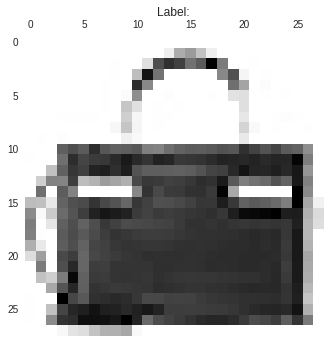

In [26]:
random_number = randint(0,60000)
image = train_fashion_images[random_number]
label = "" 

display_image(image, label)

print("Number label is: " + str(train_fashion_labels[random_number]))

###Changing numbers to strings using lists 

While it is possible to write ten if statements, it would be time consuming. The easiest way to change a small number to a string is using lists.

lists are the 

In [0]:
flowers = ["Roses", "Dasies", "Tulips", "Orchids", "Carnations"]

In [28]:
print(flowers[0])
print(flowers[1])
print(flowers[4])

Roses


'Dasies'

Because our data is labeled as an integer from 0 to 9, we can use lists to change the numbers to integers.

In [0]:
def fashion_num_to_label(label_num):
  fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  label = ...
  return label

Add this function to the display image result above above.

##Train a model

now that the data is prepared

In [0]:
fashion_MNIST_model = model_train(5, #epochs,
                                  , #input data/features
                                  , #input labels
                                  60000 #num train images (less then 60,000)
                                  )

##Visualize results

In [0]:
random_number = randint(0,60000) # picks a random number
image = ... #uses lists
label = ...

predict_image(image, 
              , # model
              label
             )

##Stats
Make sure to run the cell that contains the stat functions. 

In [0]:
stats( , #model name
      , #number of images, less then 10,000
      , #test images
      , # test labels
     )